In [11]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from pathlib import Path


/tmp/ipykernel_3078335/2380092674.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDf = newDf.append(a.mean(axis=0),ignore_index=True)


1298


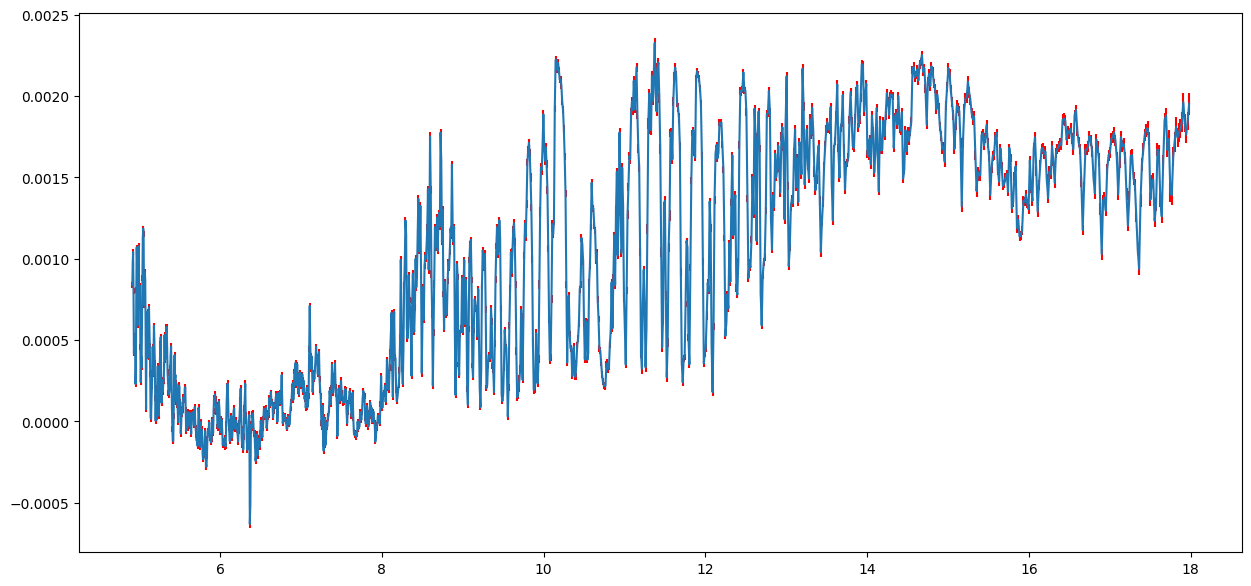

In [ ]:
for p in ['rebinned_observation_2_WISE0855.csv']: #, 'rebinned_observation_2_ROSS458C.csv' ' rebinned_observation_2_WISE0458.csv', 'rebinned_observation_2_WISE0855.csv']: 
    path = Path('.') / p
    spec= pd.DataFrame()
    spec = pd.read_csv(path, header=0, delimiter = ',')
    
    wfirst = spec['wavelength[um]'].iloc[0]
    
    ### Only appending if the subsequent wavelengths are bigger than the previous entry. This ignores repeated wls

    newDf = pd.DataFrame([])
    wold = wfirst
    for w in spec['wavelength[um]'].iloc[:]:
        if w > wold: 
            a = spec[spec['wavelength[um]'] == w]
            newDf = newDf.append(a.mean(axis=0),ignore_index=True)
            wold = w
            
    newDf.to_csv('spectrum.csv') #_2_' + p.split('_')[-1], index=False)
    print(len(newDf))
    plt.figure(figsize=(15,7))
    plt.errorbar(newDf.iloc[:, 0], newDf.iloc[:, 1], yerr = newDf.iloc[:, 2], ecolor= 'red')
    
    

<ErrorbarContainer object of 3 artists>

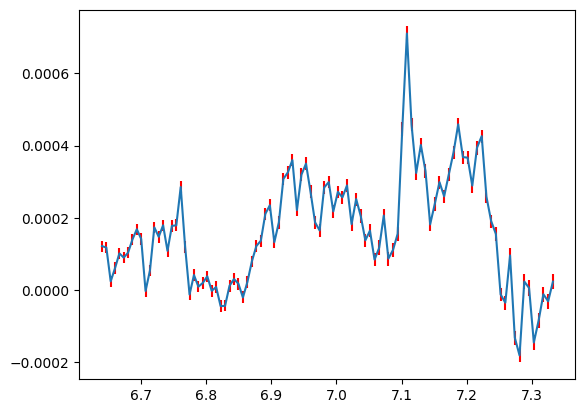

In [3]:
plt.errorbar(newDf.iloc[300:400, 0], newDf.iloc[300:400, 1], yerr = newDf.iloc[300:400, 2], ecolor= 'red')


/tmp/ipykernel_3171948/1589044059.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDf = newDf.append(a.mean(axis=0),ignore_index=True)


In [14]:
newDf

,wavelength[um],flux[Jy],error[Jy]
0,4.914667,0.000839,0.000018
1,4.919584,0.000970,0.000018
2,4.924506,0.001041,0.000017
3,4.929433,0.000800,0.000018
4,4.934365,0.000420,0.000018
...,...,...,...
1293,17.907578,0.001963,0.000054
1294,17.925494,0.001831,0.000055
1295,17.943429,0.001763,0.000054
1296,17.961381,0.001847,0.000055


In [4]:
4.901201/(4.902002 - 4.901201)

6118.8526841444245

<ErrorbarContainer object of 3 artists>

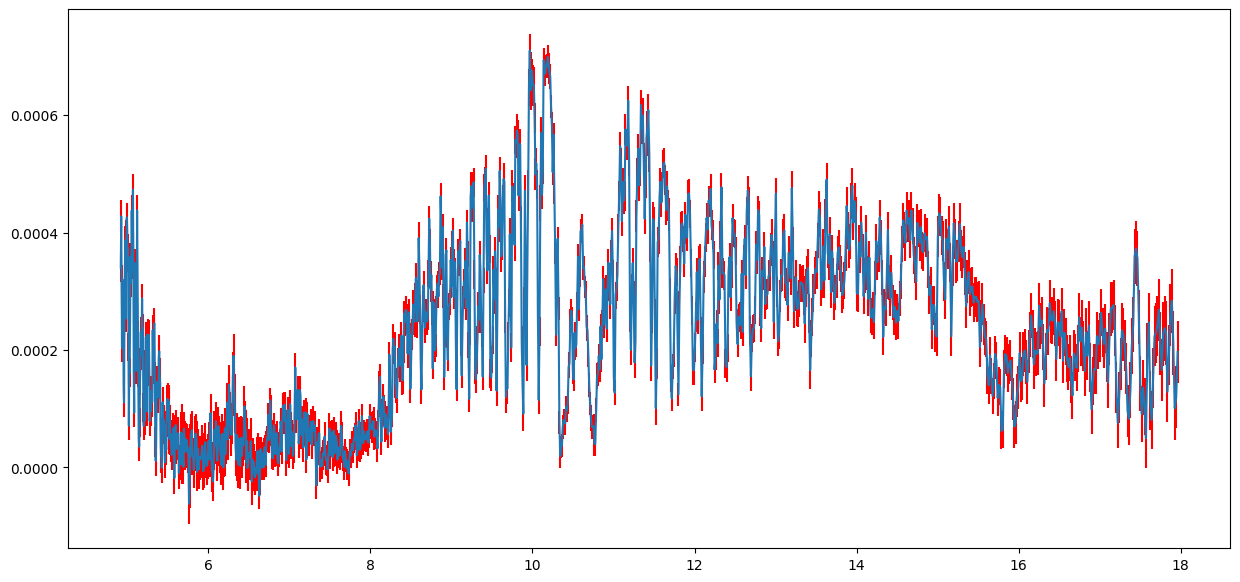

## Next decide the scaling of the observation/training spectra based on its flux!